In [1]:
#导入库
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']='STHeiti'
from datetime import datetime

In [2]:
#导入数据
df=pd.read_csv('/Users/happy/Desktop/data/kelu.csv')
df.info()
#基本信息：门票价格101，数据来自16年～19年，8k+多数据量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


In [3]:
df.describe()
#根据平均分92，中位数可知，大多数用户评分在100，效果非常不错
#16～19年门票价格都是110

,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


<Axes: xlabel='time'>

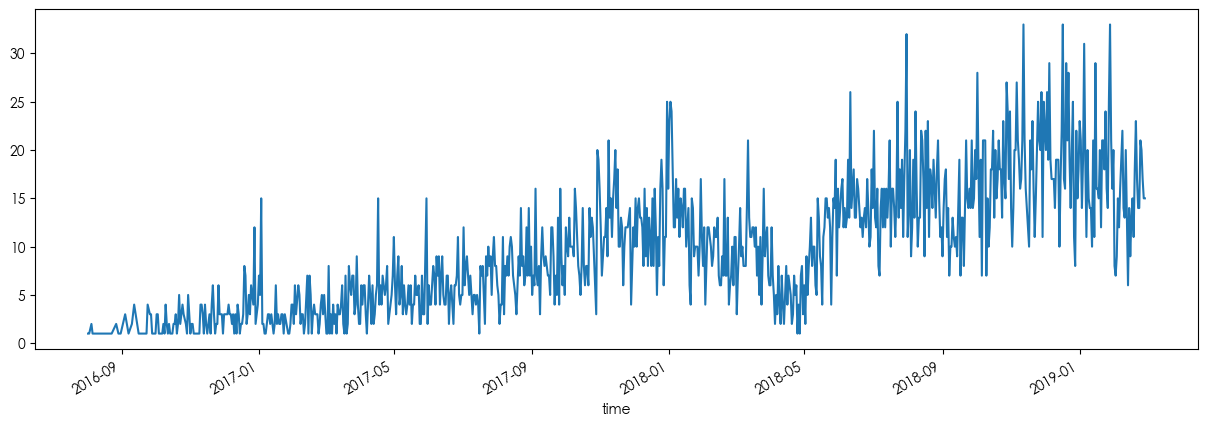

In [4]:
#a1.每天销量分析
df['time']=pd.to_datetime(df['time'])
df. groupby('time')['rating'].count().plot(figsize=(15,5))
#整体来看每日销量呈现上升趋势，但是在18年2，3，4月份出现一次较大的波动，销量急剧下滑。猜测：台风，疫情，运营推广不利
#16年9月-17年1月，销量非常低，每天2～3张门票。猜测：101观景台门票刚刚上线发售，观景台刚刚对游客进行开放


Text(0.5, 1.0, '16年～19年每月销量分析')

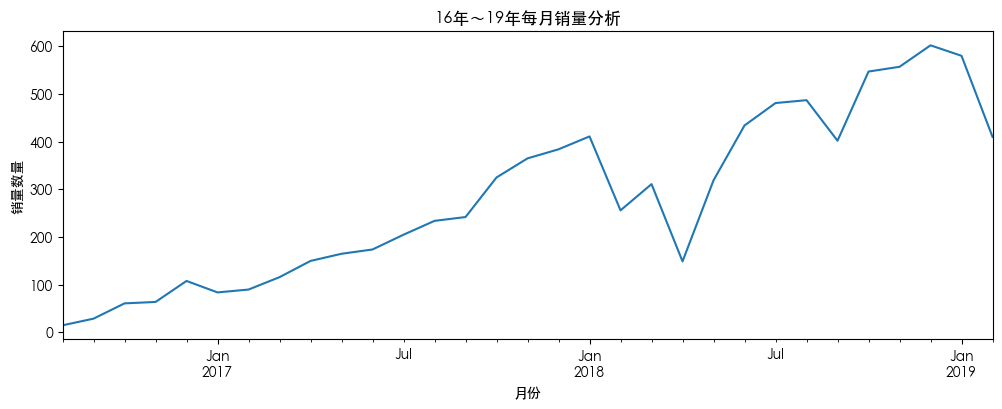

In [5]:
#a2.每月销量分析
df['month']=df['time'].values.astype('datetime64[M]') #精度保持在月份
df.head()
df.groupby('month')['rating'].count().plot(figsize=(12,4))
plt.xlabel('月份')
plt.ylabel('销量数量')
plt.title('16年～19年每月销量分析')
#每月销量呈现上升趋势，但是在18年2，3，4月份出现一次较大的波动，销量急剧下滑。


In [6]:
#a3.每个用户的购买量和消费金额分析
#merge用法，相当于sql当中的join
df1=pd.DataFrame({
    'name':['zhangsan','list'],
    'group':['A','B']
})
df2=pd.DataFrame({
    'name':['wangwu','list'],
    'score':['88','90'],
    'group':['C','D']
})
pd.merge(left=df1,right=df2,on='name',how='inner',suffixes=['_1','_2'])
#left:左表   right：右表  on:关联字段  how:inner(交集，默认)/outter（并集）
#suffixes:如果多个表有相同的列名，用给的值区别

,name,group_1,score,group_2
0,list,B,90,D


Text(0, 0.5, '消费金额')

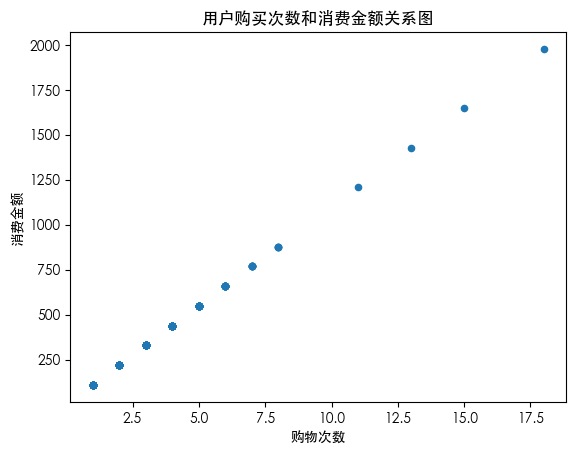

In [7]:
#按照游客分组，统计每个游客的购买次数
grouped_count_author=df.groupby('author')['frequency'].count().reset_index()
grouped_count_author
#按照游客分组，统计每个游客的消费金额
grouped_sum_amount=df.groupby('author')['amount'].sum().reset_index()
grouped_sum_amount
user_purchase_retention=pd.merge(left=grouped_count_author,right=grouped_sum_amount,on='author',how='inner')
user_purchase_retention.tail(60)   #这里主要是为了练习merge函数的使用，用agg在分组统计字段会更加方便
user_purchase_retention.plot.scatter(x='frequency',y='amount')
plt.title('用户购买次数和消费金额关系图')
plt.xlabel('购物次数')
plt.ylabel('消费金额')

Text(0.5, 1.0, '用户购买门票数量直方图')

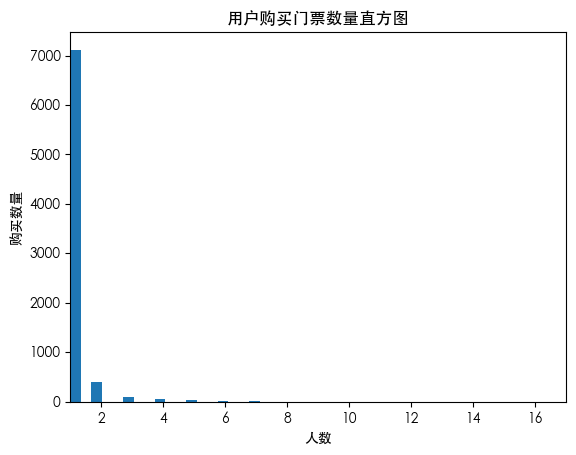

In [8]:
#b1.用户购买门票数量分析
df.groupby('author')['frequency'].count().plot.hist(bins=50) 
plt.xlim(1,17)
plt.xlabel('人数')
plt.ylabel('购买数量')
plt.title('用户购买门票数量直方图')
#绝大多数用户购买过1张门票，用户在7000人次左右
#少数人购买过2～4张门票，猜测：可能是台北周边用户



Text(0.5, 1.0, '用户购买门票2次及以上的用户数量')

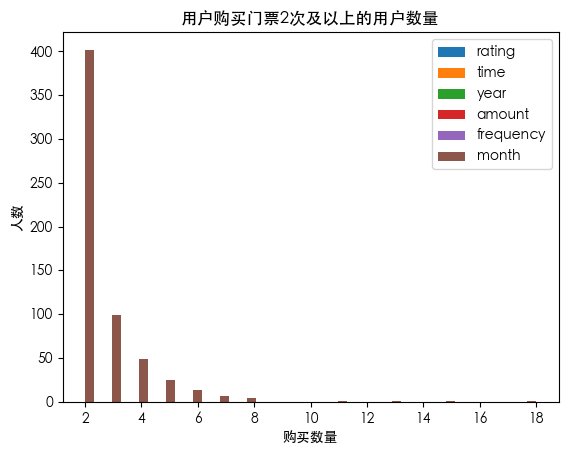

In [9]:
#b2.用户购买门票2次及以上情况分析
df_frequency_2=df.groupby('author').count().reset_index()
df_frequency_2.head()
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author').sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买门票2次及以上的用户数量')
#消费两次的用户在整体上占比比较大，大于2次的用户占小部分，用户购买次数最多为18



In [10]:
#b3.查看购买2次及以上的具体人数
df_frequency_2[df_frequency_2['frequency']>=2].groupby('frequency')['author'].count()
#除去购买一次的顾客，可以看出购买2次的有402人，购买3次的99·····



frequency
2     402
3      99
4      49
5      25
6      13
7       7
8       4
11      1
13      1
15      1
18      1
Name: author, dtype: int64

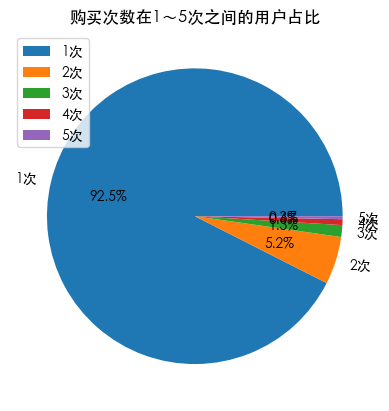

In [11]:
#b4.购买次数在1～5次的用户占比
df_frequency_gte_1=df.groupby('author')['frequency'].count().reset_index()
#购买次数>=1
df_frequency_gte_1=df_frequency_gte_1[df_frequency_gte_1['frequency']>=1]
#购买次数<=5
values=list(df_frequency_gte_1[df_frequency_gte_1['frequency']<=5].groupby('frequency')['frequency'].count())
values
#绘制饼图（饼图要是list的数据，上面筛选出的是series）
labels=['1次','2次','3次','4次','5次']
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('购买次数在1～5次之间的用户占比')
plt.legend()



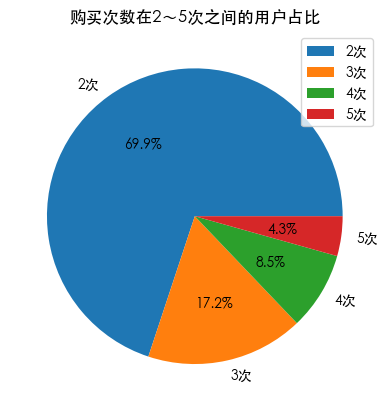

In [12]:
#b4.购买次数在1～5次的用户占比
df_frequency_gte_2=df.groupby('author')['frequency'].count().reset_index()
#购买次数>=1
df_frequency_gte_2=df_frequency_gte_2[df_frequency_gte_2['frequency']>=2]
#购买次数<=5
values=list(df_frequency_gte_2[df_frequency_gte_2['frequency']<=5].groupby('frequency')['frequency'].count())
values
#绘制饼图（饼图要是list的数据，上面筛选出的是series）
labels=['2次','3次','4次','5次']
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('购买次数在2～5次之间的用户占比')
plt.legend()
#在购物次数在2～5次的用户中，其中消费2次的占比为70%，消费3次占比17%，4次占比8.5%，5次占比4.3%
#消费2.3次的用户依然很重要
#消费次数4，5比重较少，需要针对2.3次的用户进行引导
#消费次数在1次的用户，可以尝试转化到消费2，3次

/var/folders/yd/2b4g299n5jnbqhms42xzdmgc0000gn/T/ipykernel_1244/601646349.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_count=pivot_count.applymap(lambda x:1 if x>1 else np.NAN if x==0 else 0)


Text(0.5, 1.0, '16-19年用户复购率')

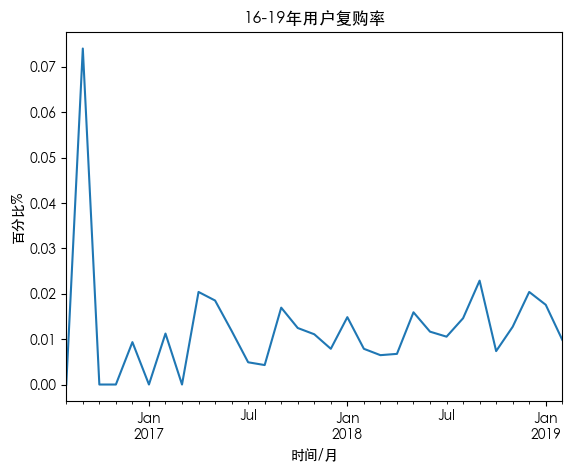

In [13]:
#c1.复购率分析
#在某一时间窗口（一个月）内消费次数在两次及以上的用户在总消费用户的占比
df
pivot_count=df.pivot_table(index='author',
                          columns='month',
                          values='frequency',
                          aggfunc='count').fillna(0)
pivot_count.head()
#三种情况：
#消费次数>1：为复购用户，用1表示
#消费次数=1:为非复购用户，用0表示
#消费次数=0:为未消费次数，用nan
pivot_count=pivot_count.applymap(lambda x:1 if x>1 else np.NAN if x==0 else 0)
(pivot_count.sum()/pivot_count.count()).plot()
plt.xlabel('时间/月')
plt.ylabel('百分比%')
plt.title('16-19年用户复购率')
#16年9月份复购率达到最高7.5%，然后开始下降，趋于平稳在1.2%

Text(0.5, 1.0, '16-19年用户复购人数')

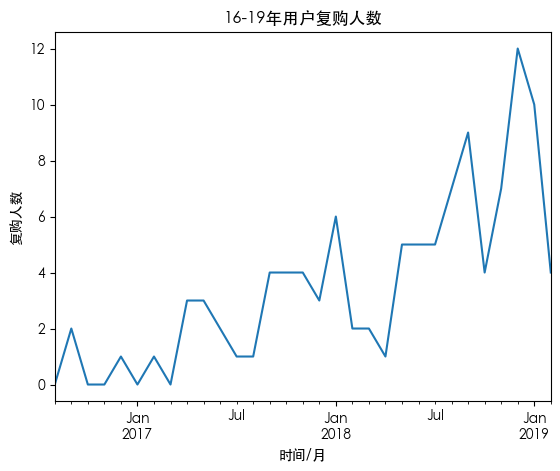

In [14]:
#c2.复购用户人数
pivot_count.sum().plot()
plt.xlabel('时间/月')
plt.ylabel('复购人数')
plt.title('16-19年用户复购人数')
#整体来看，复购人数长线上升趋势
#但是在18年2，3，4，10和10年2月份，复购人数下降较为明显，出现异常信号，需要和具体部门具体分析


/var/folders/yd/2b4g299n5jnbqhms42xzdmgc0000gn/T/ipykernel_1244/3057210705.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i]==1:
/var/folders/yd/2b4g299n5jnbqhms42xzdmgc0000gn/T/ipykernel_1244/3057210705.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i+1]==1: #下个月也消费了


Text(0, 0.5, '回购率%')

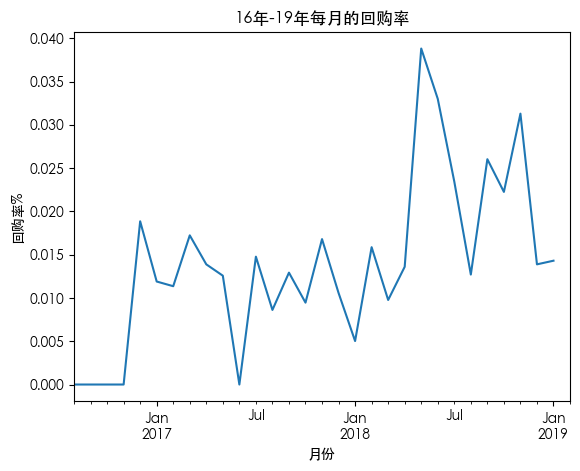

In [15]:
#c3.回购率分析
#在某一个时间窗口内消费过，在下一个时间窗口仍消费的占比
#例如：当前消费人数1000.其中200人在下个月仍消费，则回购率为20%
pivot_purchase=df.pivot_table(index='author',
                             columns='month',
                             values='frequency',
                             aggfunc='count').fillna(0)
pivot_purchase.head()
def purchase_return(data):
    status=[]
    for i in range(30):
        #本月消费了
        if data[i]==1:  
            if data[i+1]==1: #下个月也消费了
                status.append(1)
            else:              #下个月未消费
                status.append(0)
        else:#本月未消费
            status.append(np.NAN)
    status.append(np.NAN)
    return pd.Series(status,pivot_purchase.columns)
pivot_purchase_return=pivot_purchase.apply(purchase_return,axis=1)
(pivot_purchase_return.sum()/pivot_purchase_return.count()).plot()
plt.title('16年-19年每月的回购率')
plt.xlabel('月份')
plt.ylabel('回购率%')
#回购率最高在18年6月份，达到4%
#整体来看，回购率呈现微弱上升趋势
#出现几次较大下滑，分别是17年6月，18年1月，18年8月，19年1月份

Text(0, 0.5, '回购人数')

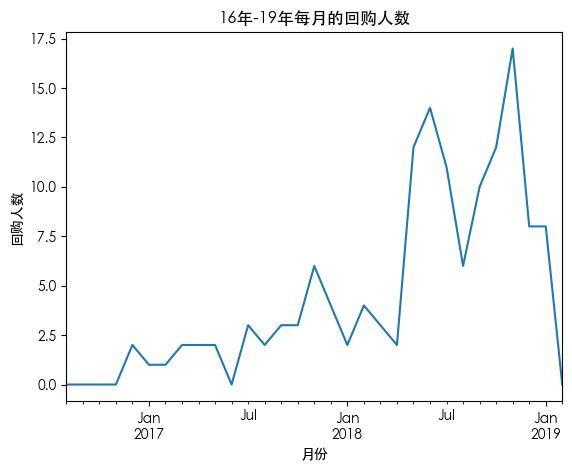

In [16]:
#c4.回购人数分析
pivot_purchase_return.sum().plot()
plt.title('16年-19年每月的回购人数')
plt.xlabel('月份')
plt.ylabel('回购人数')
#整体呈现上升趋势，回购人数最多在18年11月份，人数为17人
#出现几次较大下滑，分别是17年6月，18年1月，18年8月，19年1月份

/var/folders/yd/2b4g299n5jnbqhms42xzdmgc0000gn/T/ipykernel_1244/2257840731.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i]==0:


<Axes: xlabel='month'>

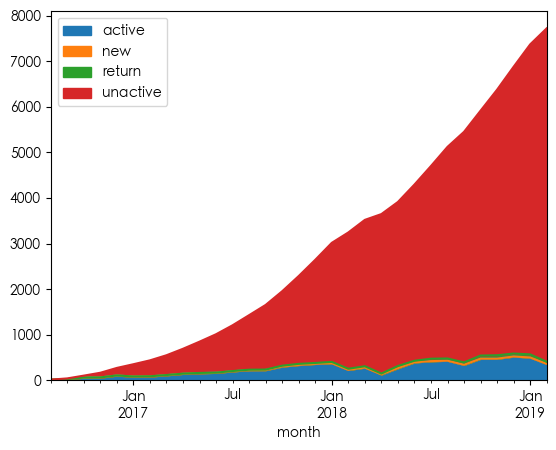

In [17]:
#c5.每个月用户分层占比情况
#活跃用户/不活跃用户/回流用户/新用户
def active_status(data):
    status=[]
    for i in range(31):
        #如果本月没有消费
        if data[i]==0:
            if len(status)==0:  #之前一直未有记录(本质上这一条是在判断第一个月的状态)
                status.append('unreg')
            else:               #之前有过记录
                if status[i-1]=='unreg':#上个月的状态
                    status.append('unreg')
                else:
                    status.append('unactive')
                    
        #本月有消费
        else:
            if len(status)==0: #之前一直未有记录(本质上这一条是在判断第一个月的状态)
                status.append('new')
            else:               #之前有记录
                if status[i-1]=='unactive':
                    status.append('return')
                elif status[i-1]=='new':
                    status.append('active')
                else:
                    status.append('active')
    return pd.Series(status,pivot_purchase.columns)
pivot_purchase_return=pivot_purchase.apply(active_status,axis=1)
pivot_status_count=pivot_purchase_return.replace('unreg',np.NAN).apply(lambda x:x.value_counts())
pivot_status_count.T.plot.area()
#可以看出，红色（不活跃用户）占据网站用户的主体
#新用户从17年的1月到19年1月，呈现上升趋势：但是在18年4月份下降，出现异常信号
#以后，新用户有开始逐渐上涨，恢复稳定状态
#回流用户，一直稳定，但是在18年出现异常下降信号，出现异常

<Axes: xlabel='month'>

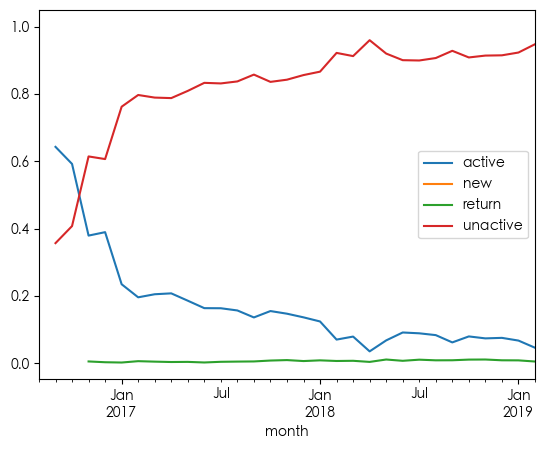

In [18]:
#c6.每月不同用户的占比
return_rate=pivot_status_count.apply(lambda x:x/x.sum())
return_rate.T.plot()
#在17年1月份过后，网站用户主题由不活跃用户组成，新用户占比逐渐下降，并且趋于稳定，稳定在10%左右
#活跃用户和回流用户用户一直很稳定，并且占比较小
#16年9月前后，新用户和不活跃用户，发生较大的变化，猜测：活动或者节假日造成··

Text(0.5, 1.0, '每月活跃用户的占比分析')

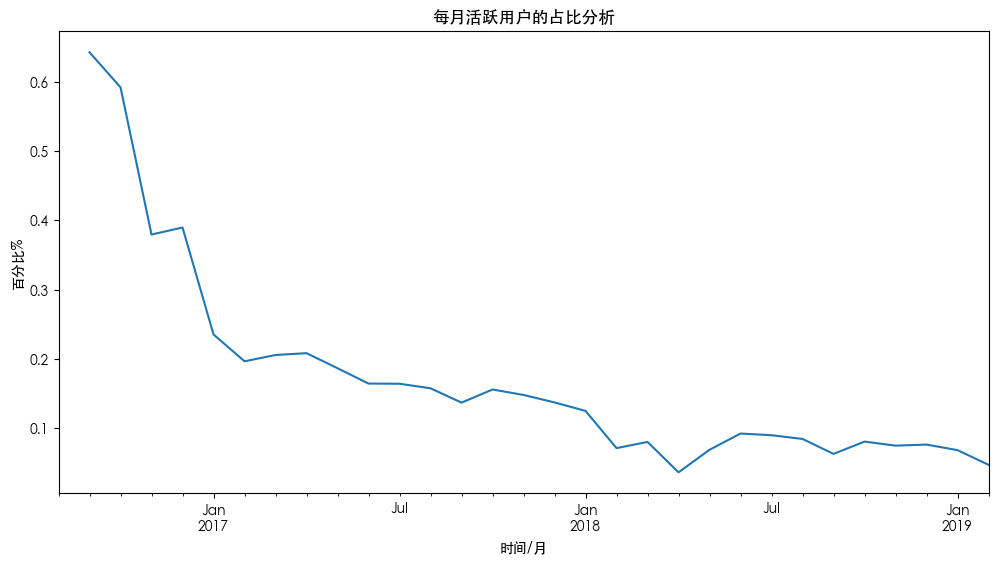

In [19]:
#c7.每月活跃用户的占比
return_rate.T['active'].plot(figsize=(12,6))
plt.xlabel('时间/月')
plt.ylabel('百分比%')
plt.title('每月活跃用户的占比分析')
#在17年1月份活跃用户占比比较高，在0.5%，但是在1-2月份，急剧下滑，猜测：春节的影响，或者温度
#结合历年1-2月份销量来看，都会出现一定比例的下降，再次验证我们的猜测：春节的影响
#在18年2月和5月出现异常，门票销量下降。猜测：雨水影响




Text(0.5, 1.0, '每月回流用户的占比分析')

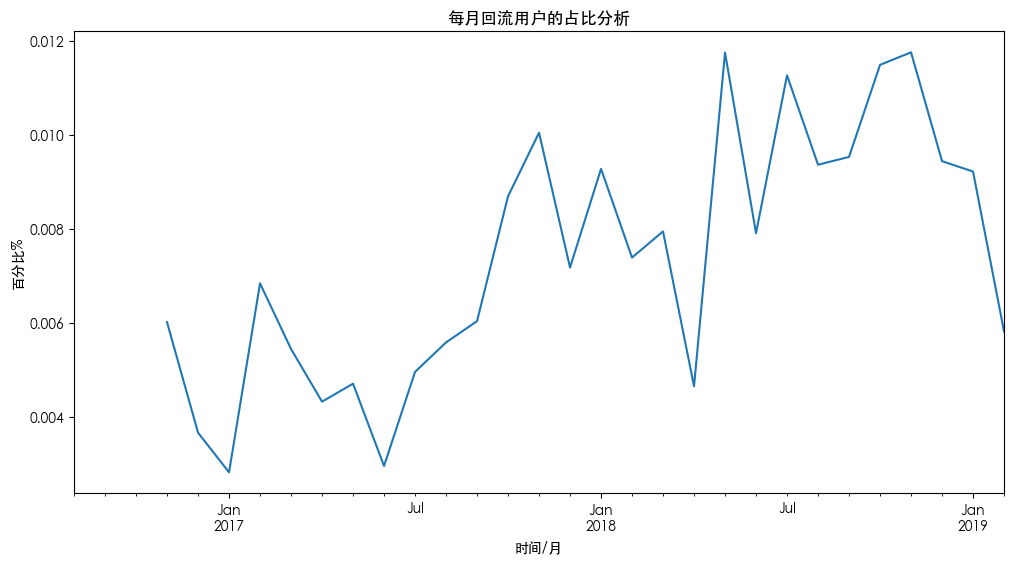

In [20]:
#c8.每月回流用户的占比
return_rate.T['return'].plot(figsize=(12,6))
plt.xlabel('时间/月')
plt.ylabel('百分比%')
plt.title('每月回流用户的占比分析')
#整体来看，回流用户比例上升趋势，但是波动较大
#在17年1月和6月，18年4月，19年2月，回流用户比例都出现较大幅度下降，表现为异常信号

In [21]:
np.mean(return_rate.T['return']) #回流用户平均值在0.73%左右
#在17年9月份以后，仅有几个异常点在平均值以下
#在17年9月份以前，所有数据都显示回流用户比例低于平均值，猜测：景点开放不久，很多游客尚未发现本景点；本景点在该平台开放不久


0.00736823576229978

In [22]:
#d1.用户的生命周期
time_min=df.groupby('author')['time'].min()
time_max=df.groupby('author')['time'].max()
life_time=(time_max-time_min).reset_index()
life_time.describe()
#通过原样本8757条和count=7722(总用户数)得知，存在一个用户多次消费
#平均生命周期为23天，通过25%，50%，75%分位数得知，绝大多数用户生命周期为0天
#最大生命周期为864天



,time
count,7722
mean,23 days 01:45:32.867132867
std,98 days 16:47:46.849668504
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,864 days 00:00:00


                  author   time  life_time
0                wenbiao 0 days        0.0
1      Goh Yu Wen Eunice 0 days        0.0
2               Hui Shan 0 days        0.0
3                 Huihui 0 days        0.0
4               KO-CHENG 0 days        0.0
...                  ...    ...        ...
7717                  芊羽 0 days        0.0
7718                  華山 0 days        0.0
7719                   蘇 0 days        0.0
7720                  郁君 0 days        0.0
7721                  青慧 0 days        0.0

[7130 rows x 3 columns]


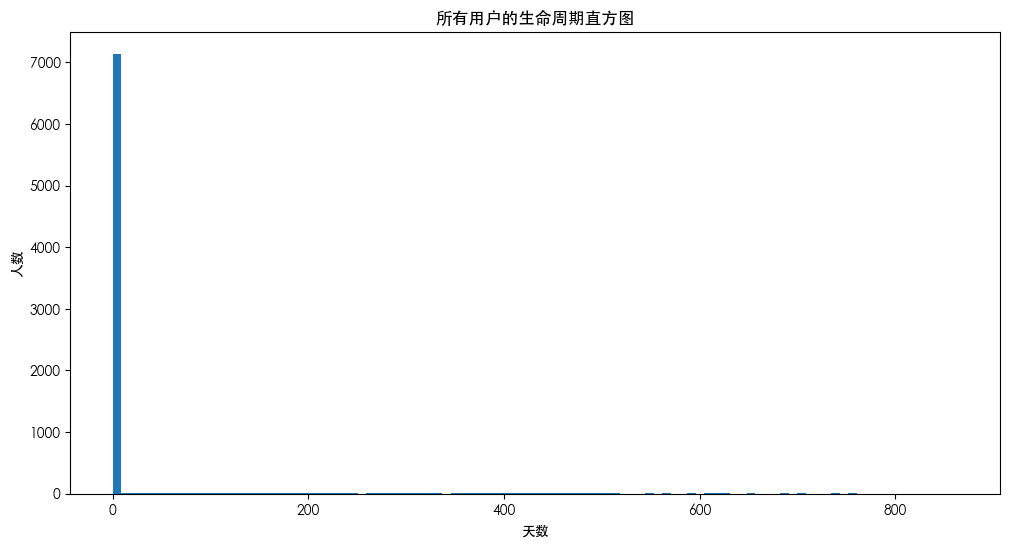

In [23]:
#用户生命周期直方图
#绘图要将日期数据转换成数值类型: /np.timedelta64(1，'D')
life_time['life_time']=life_time['time']/np.timedelta64(1,'D')  #新加上一列，为数据类型的生命周期
life_time['life_time'].plot.hist(bins=100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('所有用户的生命周期直方图')
print(life_time[life_time['life_time']==0])
#生命周期为0的用户，存在7130个用户
#由于总用户数为7722，其余592个用户生命周期>0天


300.9662162162162

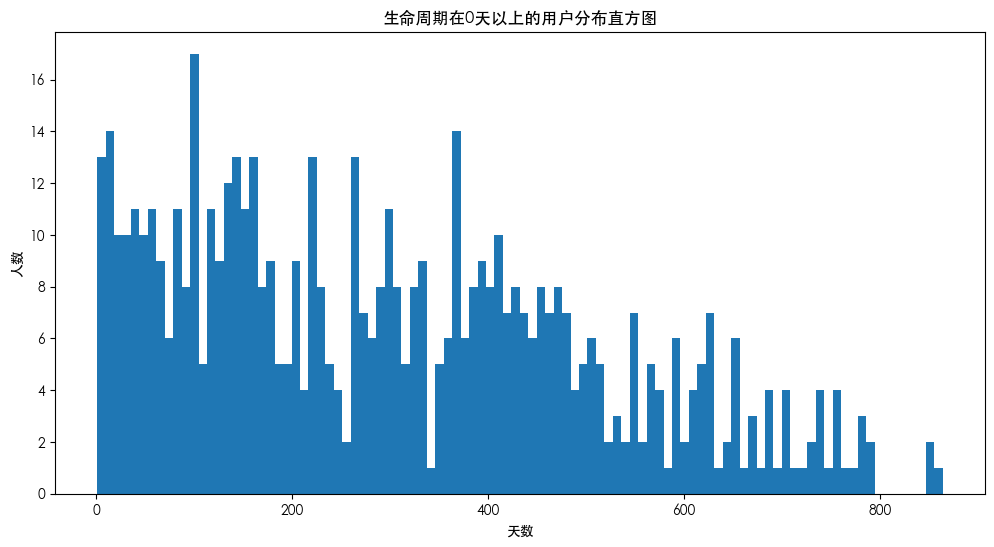

In [24]:
#d3.生命周期大于0的用于
life_time[life_time['life_time']>0]['life_time'].plot.hist(bins=100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('生命周期在0天以上的用户分布直方图')
life_time[life_time['life_time']>0]['life_time'].mean()
#去掉生命周期为0的用户，可知
#用户平均生命周期为300天，生命周期在100天的用户量达到了最大值17人
#生命周期在100·350天来看，用户量呈现缓慢下降的趋势
#350—800天左右，用户量下降速度明显，存在一定的用户流失，而忠诚客户越来越少




In [25]:
#d4.各时间段的用户留存率
#pd.cut()函数
np.random.seed(666)
score_list=np.random.randint(25,100,3)
print(score_list)
bins=[0,59,70,80,100]
score_cut=pd.cut(score_list,bins)
score_cut


[27 70 55]


[(0, 59], (59, 70], (0, 59]]
Categories (4, interval[int64, right]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]

time_diff_bin
(0, 90]       0.022663
(90, 180]     0.019814
(180, 270]    0.016058
(270, 360]    0.014893
(360, 450]    0.014375
(450, 540]    0.009842
(540, 630]    0.007641
(630, 720]    0.004921
(720, 810]    0.002720
(810, 900]    0.000389
dtype: float64


/var/folders/yd/2b4g299n5jnbqhms42xzdmgc0000gn/T/ipykernel_1244/2633455717.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_rentention=user_purchase_rentention.groupby(['author','time_diff_bin'])['frequency'].sum().unstack()
/var/folders/yd/2b4g299n5jnbqhms42xzdmgc0000gn/T/ipykernel_1244/2633455717.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_rentention_trans=pivot_rentention.fillna(0).applymap(lambda x:1 if x>=1 else 0)


Text(0.5, 1.0, '各时间段内的用户留存率')

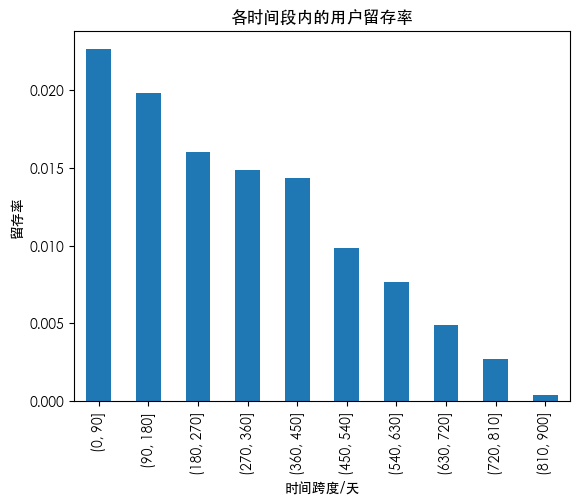

In [26]:
#留存率：1-90天有多少留存用户，求出用户的留存天数，比如留存天数为89，属于1-90天内的留存用户
#留存天数计算方式：用户每一次的消费时间分别减去用户第一次消费时间
user_purchase_rentention=pd.merge(left=df,right=time_min,how='inner',on='author',suffixes=('','_min')) #suffixes:指定相同的列名time为不同的后缀
user_purchase_rentention

#计算留存天数
user_purchase_rentention['time_diff']=user_purchase_rentention['time']-user_purchase_rentention['time_min']
user_purchase_rentention

#将time_diff转换成数值
user_purchase_rentention['time_diff']=user_purchase_rentention['time_diff'].apply(lambda x:x/np.timedelta64(1,'D'))
user_purchase_rentention

#生成时间跨度（3个月，即90天）
bin=[i*90 for i in range(11)]
user_purchase_rentention['time_diff_bin']=pd.cut(user_purchase_rentention['time_diff'],bin)
user_purchase_rentention

#统计每个游客，在不同时间段内的消费频率和值（便于后续判断是否为留存用户）
pivot_rentention=user_purchase_rentention.groupby(['author','time_diff_bin'])['frequency'].sum().unstack()

#判断是否是留存用户（是：1，不是：0）
pivot_rentention_trans=pivot_rentention.fillna(0).applymap(lambda x:1 if x>=1 else 0)
(pivot_rentention_trans.sum()/pivot_rentention_trans.count()).plot.bar()
print(pivot_rentention_trans.sum()/pivot_rentention_trans.count())
plt.xlabel('时间跨度/天')
plt.ylabel('留存率')
plt.title('各时间段内的用户留存率')
#如图，每个周期是3个月，第一个周期的留存率在2.2%,前三个周期的递减速度在0.3%左右。
#在第四五个周期的时候趋于平稳，稳定在留存率1.5%左右
#从第五个周期开始，留存率明显下降，下降到几乎0%，在第四五个周期（1年）的时候，需要采取方法将用户留住进行再次消费。
#如果在跨度为1年的时候，不召回用户，则会面临大量用户流失的风险。


In [27]:
##用户分层
##  构建RFM模型
#数据透视表的index相当于groupy
df
rfm=df.pivot_table(index='author',
               values=['time','frequency','amount'],
               aggfunc={
                   'time':'max',
                   'frequency':'sum',
                   'amount':'sum'
               })
rfm

,amount,frequency,time
author,,,
wenbiao,110,1,2018-12-31
Goh Yu Wen Eunice,110,1,2017-11-26
Hui Shan,110,1,2016-12-07
Huihui,110,1,2017-09-28
KO-CHENG,110,1,2018-07-16
...,...,...,...
芊羽,110,1,2018-03-11
華山,110,1,2017-08-14
蘇,110,1,2017-12-10


In [28]:
#日期列中的最大值减每个用户最后一次购买时间，转成天数，小数保留一位小数
rfm['R']=(rfm['time'].max()-rfm['time'])/np.timedelta64(1,'D')
rfm.rename(columns={'amount':'M','frequency':'F'},inplace=True)
rfm




,M,F,time,R
author,,,,
wenbiao,110,1,2018-12-31,59.0
Goh Yu Wen Eunice,110,1,2017-11-26,459.0
Hui Shan,110,1,2016-12-07,813.0
Huihui,110,1,2017-09-28,518.0
KO-CHENG,110,1,2018-07-16,227.0
...,...,...,...,...
芊羽,110,1,2018-03-11,354.0
華山,110,1,2017-08-14,563.0
蘇,110,1,2017-12-10,445.0


In [29]:
#RFM计算方式：每一列数据减去数据所在列的平均值，有正有负，与0（也可以是1，1的话更加显著）比较，大于0的为1，小于0的为0
def rfm_func(x):   #x分别代表rfm[['R','F','M']].apply(lambda x:x-x.mean())后结果的每一列新的数据
    level=x.apply(lambda x:'1' if x>=1 else '0') #评分
    label=level['R']+level['F']+level['M']   #拼接
    d={
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result=d[label]
    return result
#rfm['r']-rfm['r'].mean
rfm['label']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm

    

,M,F,time,R,label
author,,,,,
wenbiao,110,1,2018-12-31,59.0,一般挽留客户
Goh Yu Wen Eunice,110,1,2017-11-26,459.0,一般发展客户
Hui Shan,110,1,2016-12-07,813.0,一般发展客户
Huihui,110,1,2017-09-28,518.0,一般发展客户
KO-CHENG,110,1,2018-07-16,227.0,一般挽留客户
...,...,...,...,...,...
芊羽,110,1,2018-03-11,354.0,一般发展客户
華山,110,1,2017-08-14,563.0,一般发展客户
蘇,110,1,2017-12-10,445.0,一般发展客户


Text(0, 0.5, 'M')

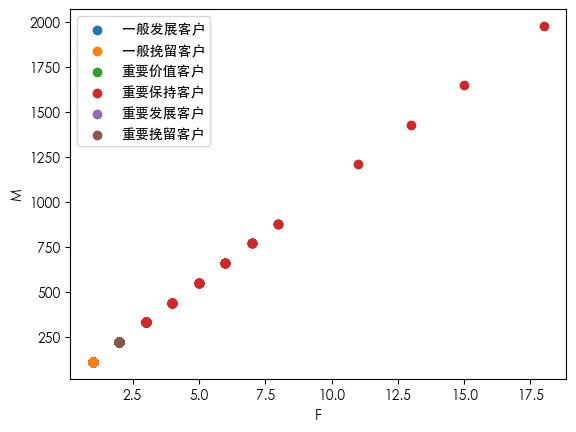

In [30]:
#客户分层可视化
for label,grouped in rfm.groupby(by='label'):
    #print(label,grouped)
    x=grouped['F']
    y=grouped['M']
    plt.scatter(x,y,label=label)
plt.legend()
plt.xlabel('F')
plt.ylabel('M')
 

In [32]:
df.to_csv('/Users/happy/Desktop/data/new.csv')